In [10]:
import pandas as pd

data = pd.read_csv("/content/btc_dataset.csv")


In [48]:
# Assuming 'data' is your DataFrame
columns = ['open', 'high', 'low', 'close', 'Volume USD']
statistics = data[columns].describe()
print(statistics)


               open          high           low         close    Volume USD
count  44419.000000  44419.000000  44419.000000  44419.000000  4.441900e+04
mean   21480.556969  21590.350107  21362.775785  21481.026110  2.804578e+06
std    16674.144532  16768.575754  16571.949239  16674.196307  6.560232e+06
min     3139.760000   3158.340000   3122.280000   3139.760000  0.000000e+00
25%     7924.585000   7961.530000   7881.615000   7924.585000  2.369850e+02
50%    16520.000000  16559.000000  16478.000000  16522.000000  4.708008e+05
75%    33258.490000  33516.835000  32932.195000  33251.215000  2.938296e+06
max    68635.050000  69000.000000  68447.000000  68627.010000  2.582324e+08


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns



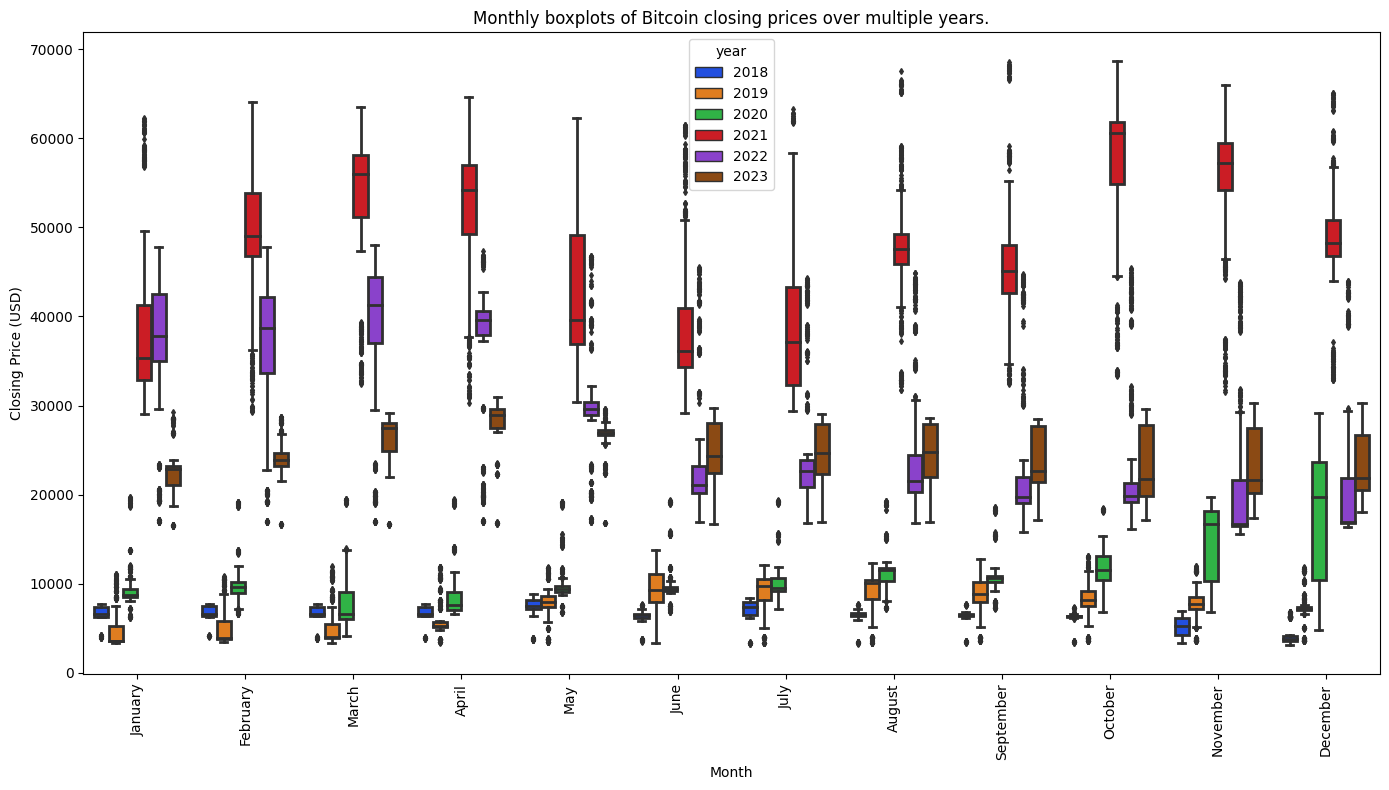

In [49]:
# Create a new column for the year and the month
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month_name()

# Order the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

# Create the boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(x='month', y='close', hue='year', data=data,
             showfliers=True, fliersize=3, linewidth=2,
             palette='bright')
plt.title('Monthly boxplots of Bitcoin closing prices over multiple years.')
plt.xlabel('Month')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
# Save the plot as a JPEG image
plt.savefig('hourly_monthly_yearly_btc_boxplot.jpg')

<Figure size 640x480 with 0 Axes>

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data['close'], model='multiplicative', period=24)


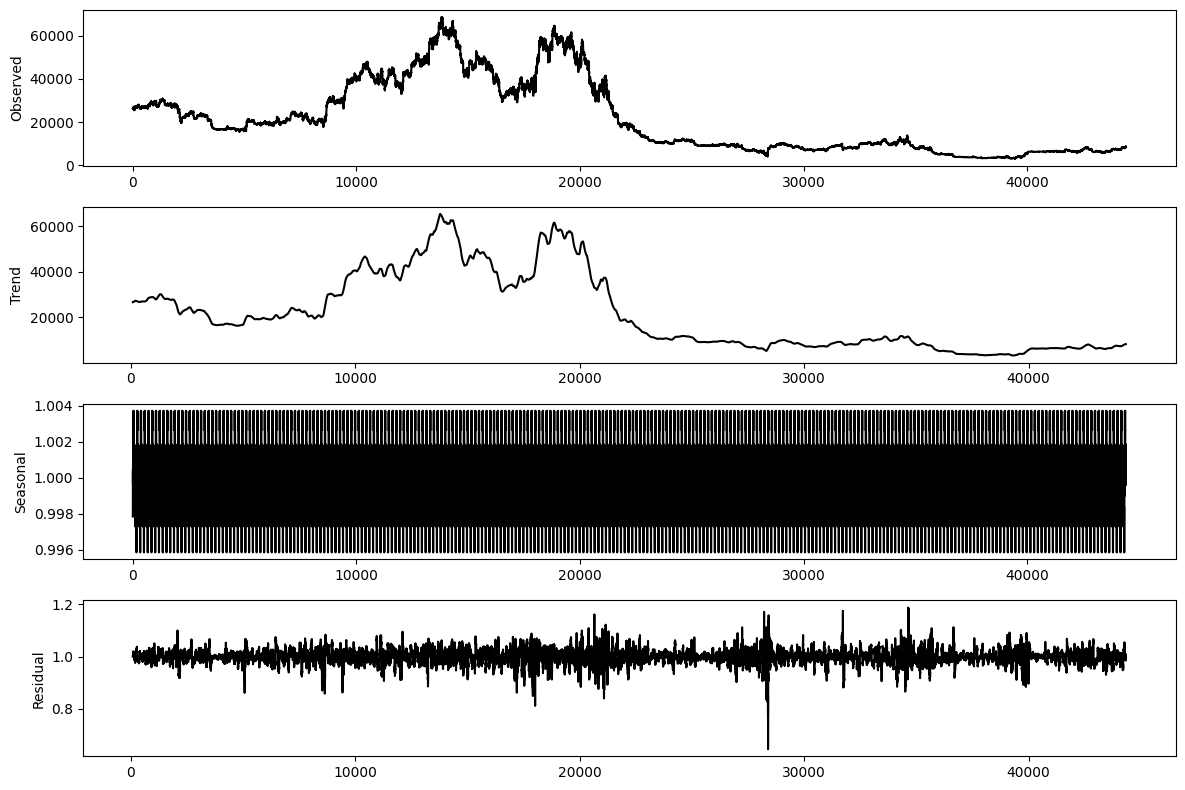

In [29]:
# Let's assume that the data has weekly cycles and try to decompose again with a period of 7*24=168 hours
decomposition = seasonal_decompose(data['close'], model='multiplicative', period=168)

# Plot the decomposed time series
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1, color='black')
ax1.set(ylabel='Observed')
decomposition.trend.plot(ax=ax2, color='black')
ax2.set(ylabel='Trend')
decomposition.seasonal.plot(ax=ax3, color='black')
ax3.set(ylabel='Seasonal')
decomposition.resid.plot(ax=ax4, color='black')
ax4.set(ylabel='Residual')
plt.tight_layout()
plt.show()



<ipython-input-42-6c50e3b69dfa>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


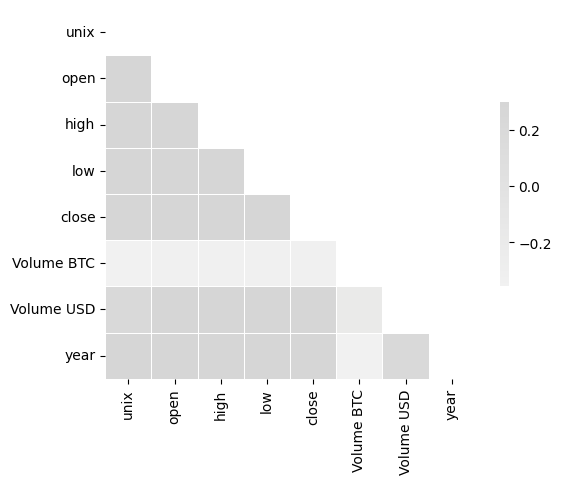

In [42]:
import seaborn as sns
import numpy as np


# Calculate the correlation matrix
corr = data.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set the colormap
cmap = sns.light_palette("gray", as_cmap=True)

# Reverse the color
center = 1

# Draw the heatmap with the new colormap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=center,
             square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [41]:
# Calculate the correlation matrix
corr = data.corr()

# Create a table of the correlation coefficients
corr_table = corr.stack()
corr_table.name = "Correlation"
corr_table.index.names = ["Variable 1", "Variable 2"]

# Print the table
print(corr_table.to_string())

Variable 1  Variable 2
unix        unix          1.000000
            open          0.606620
            high          0.605833
            low           0.607562
            close         0.606601
            Volume BTC   -0.356237
            Volume USD    0.206632
            year          0.982008
open        unix          0.606620
            open          1.000000
            high          0.999953
            low           0.999931
            close         0.999918
            Volume BTC   -0.338704
            Volume USD    0.447699
            year          0.605395
high        unix          0.605833
            open          0.999953
            high          1.000000
            low           0.999894
            close         0.999954
            Volume BTC   -0.337837
            Volume USD    0.451459
            year          0.604746
low         unix          0.607562
            open          0.999931
            high          0.999894
            low           1.0000

<ipython-input-41-cab781445481>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


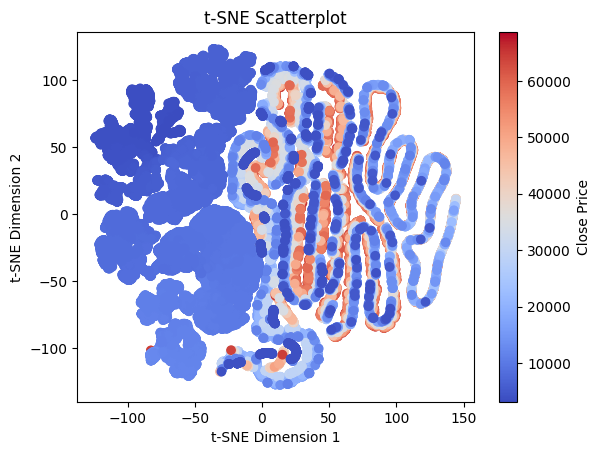

In [45]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
features = ['open', 'high', 'low', 'Volume USD']  # Replace with your actual feature column names
X = data[features]
y = data['close']  # assuming you're predicting the 'close' price

# Initialize a t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE dimensionality reduction
X_tsne = tsne.fit_transform(X)

# Create a scatterplot of the t-SNE representation
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Scatterplot')
plt.colorbar(label='Close Price')
plt.show()


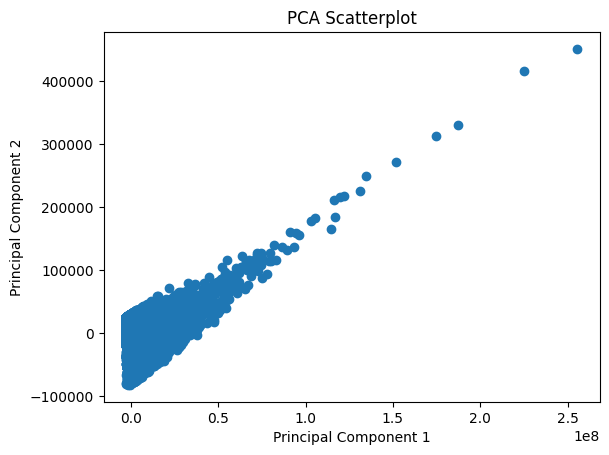

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
features = ['open', 'high', 'low', 'Volume USD']  # Replace with your actual feature column names
X = data[features]

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatterplot of the PCA representation
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatterplot')
plt.show()


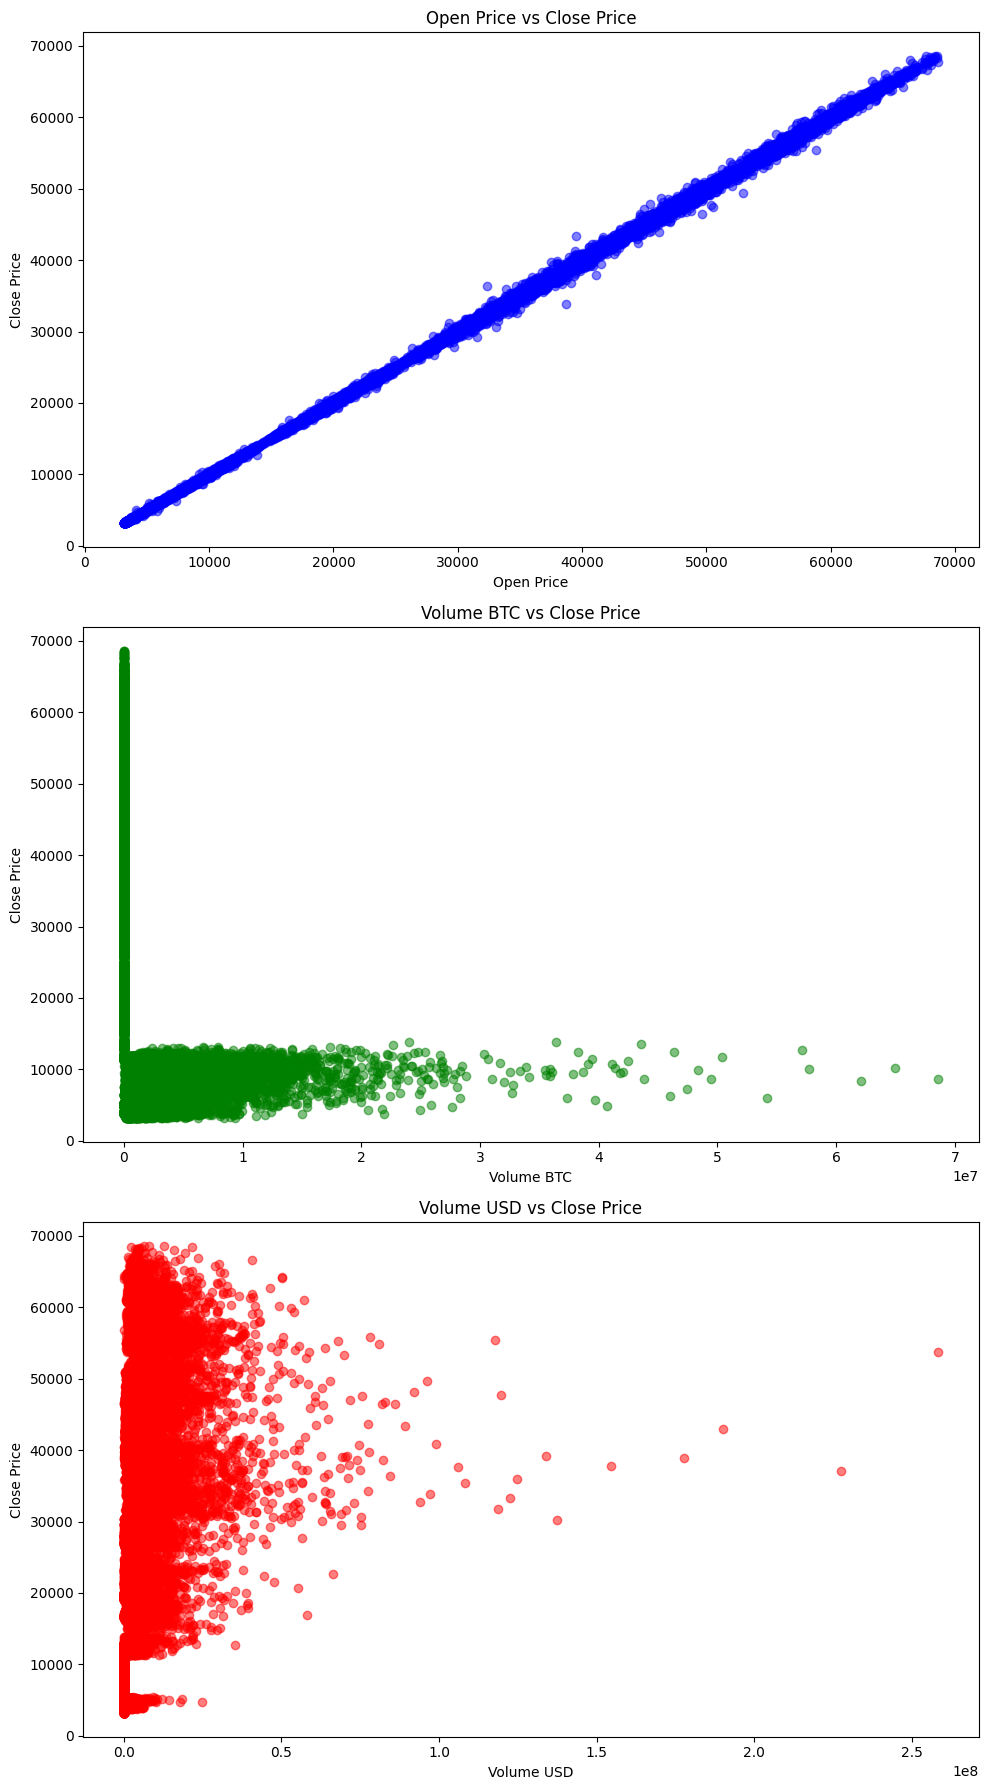

In [44]:
# Create scatter plots
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Scatter plot for 'open' and 'close' price
ax[0].scatter(data['open'], data['close'], color='blue', alpha=0.5)
ax[0].set_xlabel('Open Price')
ax[0].set_ylabel('Close Price')
ax[0].set_title('Open Price vs Close Price')

# Scatter plot for 'Volume BTC' and 'close' price
ax[1].scatter(data['Volume BTC'], data['close'], color='green', alpha=0.5)
ax[1].set_xlabel('Volume BTC')
ax[1].set_ylabel('Close Price')
ax[1].set_title('Volume BTC vs Close Price')

# Scatter plot for 'Volume USD' and 'close' price
ax[2].scatter(data['Volume USD'], data['close'], color='red', alpha=0.5)
ax[2].set_xlabel('Volume USD')
ax[2].set_ylabel('Close Price')
ax[2].set_title('Volume USD vs Close Price')

plt.tight_layout()
plt.show()
